In [ ]:
+++

# Factorización QR


Algoritmo de factorización QR

Para cada  $j$, calculamos una simple proyección  $$v_j = P_ja_j$$  donde $P_j$ es la proyección en el espacio ortogonal del span de $q_1,\ldots,q_{j-1}$.


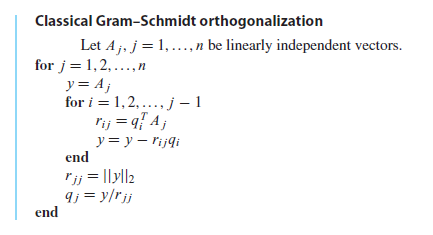

In [ ]:
import numpy as np

np.set_printoptions(suppress=True, precision=4)  # precision work

## implementación del método QR básico

In [ ]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    for j in range(n):
        v = A[:,j]
        for i in range(j):
            R[i,j] = np.dot(Q[:,i], A[:,j])
            v = v - (R[i,j] * Q[:,i])
        R[j,j] = np.linalg.norm(v)
        Q[:, j] = v / R[j,j]
    return Q, R

In [ ]:
## creation of example matrix
n = 6
A = np.random.rand(n,n)

Q, R = cgs(A)

## comprobation 

np.allclose(A, Q @ R)

True


El metodo de Gram-Schmidt, es inestable, pues para cad $j$ calcula una simple proyección $$v_j = P_ja_j$$ donde $P_j$ proyecta ene le espacio ortogonal del span de  $q_1,\ldots,q_{j-1}$.

si modificamos  Gram-Schmidt: para cada  $j$, calculamos $j-1$ proyectando $$P_j = P_{\perp q_{j-1}\cdots\perp q_{2}\perp q_{1}}$$

In [ ]:
def mgs(A):
    V = A.copy()
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    for i in range(n):
        R[i,i] = np.linalg.norm(V[:,i])
        Q[:,i] = V[:,i] / R[i,i]
        for j in range(i, n):
            R[i,j] = np.dot(Q[:,i],V[:,j])
            V[:,j] = V[:,j] - R[i,j]*Q[:,i]
    return Q, R

# Householder

\begin{array}{ l | l | c }
\hline
Gram-Schmidt & Triangular\, Orthogonalization & A R_1 R_2 \cdots R_n = Q  \\
Householder  & Orthogonal\, Triangularization & Q_n \cdots Q_2 Q_1 A = R  \\
\hline
\end{array}

Householder reflections lead to a more nearly orthogonal matrix Q with rounding errors

Gram-Schmidt can be stopped part-way, leaving a reduced QR of 1st n columns of A

## algoritmo

In [ ]:
def householder_lots(A):
    m, n = A.shape
    R = np.copy(A)
    V = []
    Fs = []
    for k in range(n):
        v = np.copy(R[k:,k])
        v = np.reshape(v, (n-k, 1))
        v[0] += np.sign(v[0]) * np.linalg.norm(v)
        v /= np.linalg.norm(v)
        R[k:,k:] = R[k:,k:] - 2*np.matmul(v, np.matmul(v.T, R[k:,k:]))
        V.append(v)
        F = np.eye(n-k) - 2 * np.matmul(v, v.T)/np.matmul(v.T, v)
        Fs.append(F)
    return R, V, Fs